# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

625

In [5]:
#create a dataframe to store city info
df_cities = pd.DataFrame({'City': cities})
#add columns to store information from openweathermap api
df_cities['Country'] = ''
df_cities['Latitude'] = ''
df_cities['Longitude'] = ''
df_cities['Max Temperature (F)'] = ''
df_cities['Humidity (%)'] = ''
df_cities['Cloudiness (%)'] = ''
df_cities['Wind Speed (mph)'] = ''
df_cities['Date'] = ''
df_test = df_cities.copy()
df_test

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,chenghai,,,,,,,,
1,bluff,,,,,,,,
2,rantepao,,,,,,,,
3,roma,,,,,,,,
4,rikitea,,,,,,,,
...,...,...,...,...,...,...,...,...,...
620,dvinskoy,,,,,,,,
621,sabzevar,,,,,,,,
622,zihuatanejo,,,,,,,,
623,thohoyandou,,,,,,,,


In [33]:
api_key = (weather_api_key)


In [7]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

params = {
    "mode": "json",
    "units" : "metric",
    "appid": api_key     
}
sets = 1
count = 0

for index, row in df_test.iterrows():
    city_name = row["City"]
    params['q'] = str(city_name)
    
    response = requests.get(url, params = params)
    response_json = response.json()
   # print(response_json)
    if response_json["cod"] == 200 :
        
        df_test.loc[index, 'Country'] = response_json['sys']['country']
        df_test.loc[index, 'Latitude'] = response_json['coord']['lat']
        df_test.loc[index, 'Longitude'] = response_json['coord']['lon']
        df_test.loc[index, 'Max Temperature (F)'] = response_json['main']['temp_max']
        df_test.loc[index, 'Humidity (%)'] = response_json['main']['humidity']
        df_test.loc[index, 'Cloudiness (%)'] = response_json['clouds']['all']
        df_test.loc[index, 'Wind Speed (mph)'] = response_json['wind']['speed']
        df_test.loc[index, 'Date'] = response_json['dt']
     
    else:
        count =  count + 1
        
        
    if count ==50:
        
        count = 0
        sets = sets +1
                   
    print(f"Processing Record {count} of Set {sets} | {city_name}")


Processing Record 16 of Set 1 | kamenskoye
Processing Record 17 of Set 1 | satitoa
Processing Record 17 of Set 1 | pemangkat
Processing Record 17 of Set 1 | soyo
Processing Record 17 of Set 1 | saint anthony
Processing Record 18 of Set 1 | fevralsk
Processing Record 18 of Set 1 | sitka
Processing Record 18 of Set 1 | sfantu gheorghe
Processing Record 19 of Set 1 | mys shmidta
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | toliary
Processing Record 20 of Set 1 | kinango
Processing Record 20 of Set 1 | busselton
Processing Record 20 of Set 1 | fukue
Processing Record 20 of Set 1 | taltal
Processing Record 20 of Set 1 | luderitz
Processing Record 20 of Set 1 | umm lajj
Processing Record 20 of Set 1 | mar del plata
Processing Record 20 of Set 1 | broken hill
Processing Record 20 of Set 1 | oleksandrivka
Processing Record 20 of Set 1 | pimentel
Processing Record 20 of Set 1 | penzance
Processing Record 20 of Set 1 | praia
Processing Record 20 of Set 1 | bathsheba
Pro

In [8]:
response_json

{'coord': {'lon': -122.7, 'lat': 58.81},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': -1.14,
  'feels_like': -5.4,
  'temp_min': -1.14,
  'temp_max': -1.14,
  'pressure': 1011,
  'humidity': 84,
  'sea_level': 1011,
  'grnd_level': 959},
 'visibility': 10000,
 'wind': {'speed': 2.59, 'deg': 161},
 'clouds': {'all': 100},
 'dt': 1606848643,
 'sys': {'country': 'CA', 'sunrise': 1606840672, 'sunset': 1606864964},
 'timezone': -25200,
 'id': 5955902,
 'name': 'Fort Nelson',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
df_test.to_csv('weatherpy_9_53.csv', index=False)

In [10]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [11]:
df_test

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,chenghai,CN,23.46,116.77,18,63,0,2.85,1606848552
1,bluff,NZ,-46.6,168.33,14.44,52,100,1.79,1606848552
2,rantepao,ID,-2.97,119.9,19.29,88,86,1.13,1606848553
3,roma,US,43.21,-75.46,8.33,87,99,5.54,1606848553
4,rikitea,PF,-23.12,-134.97,24.12,71,65,3.22,1606848553
...,...,...,...,...,...,...,...,...,...
620,dvinskoy,RU,62.15,45.12,-3.43,96,96,3.24,1606848642
621,sabzevar,IR,36.21,57.68,11.85,51,59,0.7,1606848642
622,zihuatanejo,MX,17.63,-101.55,29.16,62,49,2.71,1606848642
623,thohoyandou,ZA,-22.95,30.48,25.68,52,28,2.23,1606848643


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Code to export the city data to a csv.
df_test.to_csv(r'C:\Users\Stagner\Documents\Davids Folder\Boot Camp\Class Content\06-Python-APIs\Homework\python-api-challenge\weatherpy.csv', index = True, header=True)


In [13]:
# Display the DataFrame
df_test.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,chenghai,CN,23.46,116.77,18,63,0,2.85,1606848552
1,bluff,NZ,-46.6,168.33,14.44,52,100,1.79,1606848552
2,rantepao,ID,-2.97,119.9,19.29,88,86,1.13,1606848553
3,roma,US,43.21,-75.46,8.33,87,99,5.54,1606848553
4,rikitea,PF,-23.12,-134.97,24.12,71,65,3.22,1606848553


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
df_test.dtypes

City                   object
Country                object
Latitude               object
Longitude              object
Max Temperature (F)    object
Humidity (%)           object
Cloudiness (%)         object
Wind Speed (mph)       object
Date                   object
dtype: object

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [16]:
df_test

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,chenghai,CN,23.46,116.77,18,63,0,2.85,1606848552
1,bluff,NZ,-46.6,168.33,14.44,52,100,1.79,1606848552
2,rantepao,ID,-2.97,119.9,19.29,88,86,1.13,1606848553
3,roma,US,43.21,-75.46,8.33,87,99,5.54,1606848553
4,rikitea,PF,-23.12,-134.97,24.12,71,65,3.22,1606848553
...,...,...,...,...,...,...,...,...,...
620,dvinskoy,RU,62.15,45.12,-3.43,96,96,3.24,1606848642
621,sabzevar,IR,36.21,57.68,11.85,51,59,0.7,1606848642
622,zihuatanejo,MX,17.63,-101.55,29.16,62,49,2.71,1606848642
623,thohoyandou,ZA,-22.95,30.48,25.68,52,28,2.23,1606848643


In [17]:
# df_test = df_test.dropna

# Convert data types from strings to floats for scatter plots. Note: the Longitude and Wind Speed would not convert.
df_test["Latitude"] = pd.to_numeric(df_test["Latitude"], downcast="float")
# df_test["Longitude "] = pd.to_numeric(df_test["Longitude "], downcast="float")
df_test["Max Temperature (F)"] = pd.to_numeric(df_test["Max Temperature (F)"], downcast="float")*1.8+32
df_test["Humidity (%)"] = pd.to_numeric(df_test["Humidity (%)"], downcast="float")
df_test["Cloudiness (%)"] = pd.to_numeric(df_test["Cloudiness (%)"], downcast="float")
df_test["Wind Speed (mph)"] = pd.to_numeric(df_test["Wind Speed (mph)"], downcast="float")
df_test.dtypes

City                    object
Country                 object
Latitude               float32
Longitude               object
Max Temperature (F)    float32
Humidity (%)           float32
Cloudiness (%)         float32
Wind Speed (mph)       float32
Date                    object
dtype: object

In [18]:
df_test.loc[df_test["Humidity (%)"] < 100, ["City"]]

,City
0,chenghai
1,bluff
2,rantepao
3,roma
4,rikitea
...,...
620,dvinskoy
621,sabzevar
622,zihuatanejo
623,thohoyandou


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

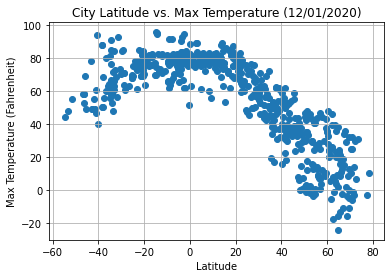

In [19]:
plt.scatter(df_test["Latitude"], df_test["Max Temperature (F)"], marker="o")

# # Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (12/01/2020)")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("TemperatureInWorldCities.png")

# # Show plot
plt.show()
# This code is grabbing the Latitude and Max Temp values from the df_test dataFrame to create a scatter plot with "o" as the marker.
# The data clearly shows that temperature is strongly related to latitude. Temperatures are higher near the equator. 

## Latitude vs. Humidity Plot

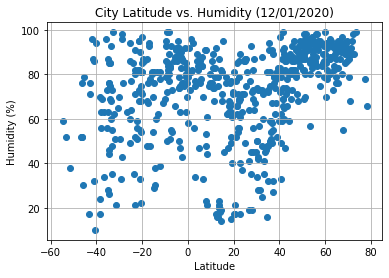

In [20]:
plt.scatter(df_test["Latitude"], df_test["Humidity (%)"], marker="o")

# # Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (12/01/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("HumidityInWorldCities.png")

# # Show plot
plt.show()
# This code is grabbing the Latitude and Humidity values from the df_test dataFrame to create a scatter plot with "o" as the marker.
# The data shows that humidity is not strongly related to latitude with data points widely distributed. 

## Latitude vs. Cloudiness Plot

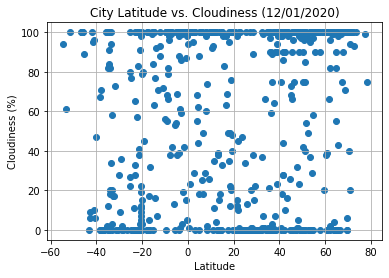

In [21]:
plt.scatter(df_test["Latitude"], df_test["Cloudiness (%)"], marker="o")

# # Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (12/01/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("CloudinessInWorldCities.png")

# # Show plot
plt.show()
# This code is grabbing the Latitude and Cloudiness values from the df_test dataFrame to create a scatter plot with "o" as the marker.
# The data shows that cloudiness is not strongly related to latitude with data points widely distributed. 

## Latitude vs. Wind Speed Plot

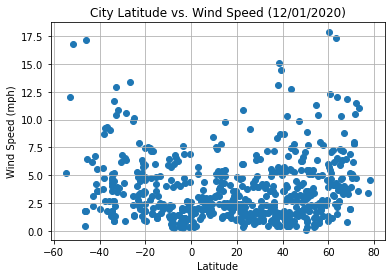

In [22]:
plt.scatter(df_test["Latitude"], df_test["Wind Speed (mph)"], marker="o")

# # Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (12/01/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# # Show plot
plt.show()
# This code is grabbing the Latitude and Wind Speed values from the df_test dataFrame to create a scatter plot with "o" as the marker.
# The data  shows that wind speed is not strongly related to latitude. It does appear that wind speeds >10 mph occur at less frequency.  

## Linear Regression

In [23]:
north_df = df_test.loc[df_test["Latitude"] >= 0, :]
#north_df

south_df = df_test.loc[df_test["Latitude"] < 0, :]
# south_df

def make_plots(x, y, graph_title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    # Get regression values
    regress_values = x * slope + intercept
    print(regress_values)
    plt.plot(x,y, "o", label= "points")
    plt.plot(x, intercept + slope * x, "r", label= "line")
    plt.legend()
    plt.title(graph_title)
    plt.grid(True)
    plt.show()



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

0      63.328648
3      39.871758
5       9.799431
9      41.190094
13     36.451206
         ...    
618    69.706543
620    17.376892
621    48.185593
622    70.252884
624    21.343781
Name: Latitude, Length: 383, dtype: float32


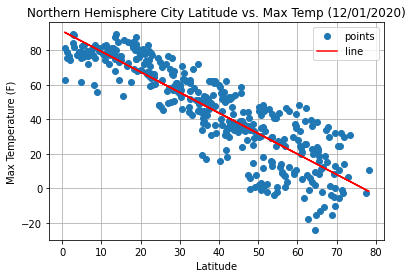

In [24]:
x = north_df["Latitude"]
y = north_df["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Get regression values
regress_values = x * slope + intercept
print(regress_values)
plt.plot(x,y, "o", label= "points")
plt.plot(x, intercept + slope * x, "r", label= "line")
plt.legend()
plt.title("Northern Hemisphere City Latitude vs. Max Temp (12/01/2020)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
# This code is grabbing the Latitude and Max Temp values from the north_df to create a scatter plot with "o" as the marker and adding a regression line.
# The regression line clearly shows that temperature is strongly related to latitude. Temperatures are higher near the equator. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

1      61.333344
2      80.504158
4      71.650345
6      66.685181
7      80.653549
         ...    
613    65.186836
616    70.749580
617    68.767906
619    77.850204
623    71.725037
Name: Latitude, Length: 191, dtype: float32


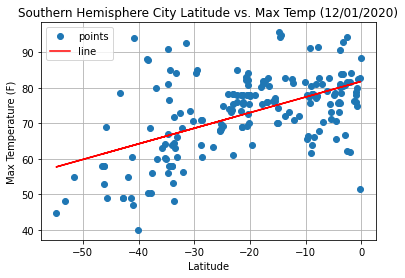

In [25]:
x = south_df["Latitude"]
y = south_df["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Get regression values
regress_values = x * slope + intercept
print(regress_values)
plt.plot(x,y, "o", label= "points")
plt.plot(x, intercept + slope * x, "r", label= "line")
plt.legend()
plt.title("Southern Hemisphere City Latitude vs. Max Temp (12/01/2020)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
# This code is grabbing the Latitude and Max Temp values from the south_df to create a scatter plot with "o" as the marker and adding a regression line.
# The regression line clearly shows again that temperature is strongly related to latitude. Temperatures are higher near the equator. 

In [26]:
# Northern & Southern Hemisphere Max Temp vs. Latitude Linear Regression

Northern Hemisphere
0      63.328648
3      39.871758
5       9.799431
9      41.190094
13     36.451206
         ...    
618    69.706543
620    17.376892
621    48.185593
622    70.252884
624    21.343781
Name: Latitude, Length: 383, dtype: float32


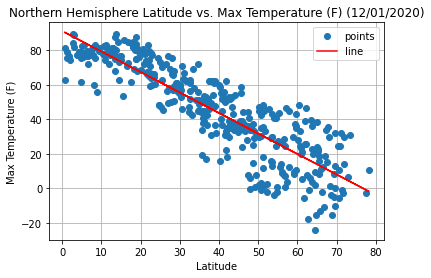

Southern Hemisphere
1      61.333344
2      80.504158
4      71.650345
6      66.685181
7      80.653549
         ...    
613    65.186836
616    70.749580
617    68.767906
619    77.850204
623    71.725037
Name: Latitude, Length: 191, dtype: float32


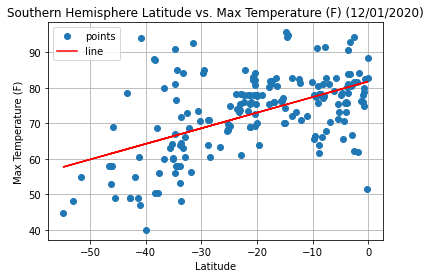

In [27]:
# This code uses a for loop to create both the Northern and Southern Hemisphere charts for Max Temperature at the same time.
hem_dict = {'Northern Hemisphere': north_df, 'Southern Hemisphere': south_df}

for _hemisphere in hem_dict.keys():
    print(_hemisphere)
    y_axis = "Max Temperature (F)"
    hem_df = hem_dict[_hemisphere]
    x = hem_df['Latitude']
    y = hem_df[y_axis]
    _title = _hemisphere + " Latitude vs. %s" %y_axis + " (12/01/2020)"
    plt.ylabel("Max Temperature (F)")
    plt.xlabel("Latitude")
    make_plots(x, y, _title)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      66.613693
3      76.019730
5      88.078491
9      75.491081
13     77.391342
         ...    
618    64.056213
620    85.039993
621    72.685944
622    63.837132
624    83.449303
Name: Latitude, Length: 383, dtype: float32


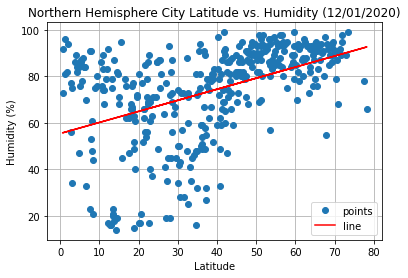

In [28]:
x = north_df["Latitude"]
y = north_df["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Get regression values
regress_values = x * slope + intercept
print(regress_values)
plt.plot(x,y, "o", label= "points")
plt.plot(x, intercept + slope * x, "r", label= "line")
plt.legend()
plt.title("Northern Hemisphere City Latitude vs. Humidity (12/01/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
# This code is grabbing the Latitude and Humidity values from the north_df to create a scatter plot with "o" as the marker and adding a regression line.
# The regression line appears to show some correlation between humidity and latitude with humidity rising some as you go further from the equator.  

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

1      56.354759
2      78.614662
4      68.334190
6      62.568962
7      78.788132
         ...    
613    60.829185
616    67.288284
617    64.987297
619    75.533073
623    68.420921
Name: Latitude, Length: 191, dtype: float32


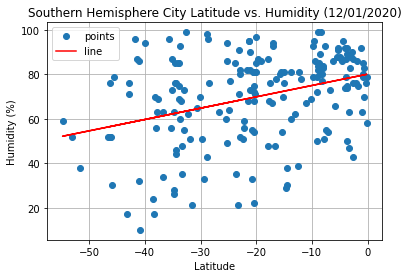

In [29]:
x = south_df["Latitude"]
y = south_df["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Get regression values
regress_values = x * slope + intercept
print(regress_values)
plt.plot(x,y, "o", label= "points")
plt.plot(x, intercept + slope * x, "r", label= "line")
plt.legend()
plt.title("Southern Hemisphere City Latitude vs. Humidity (12/01/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
# This code is grabbing the Latitude and Humidity values from the south_df to create a scatter plot with "o" as the marker and adding a regression line.
# The regression line appears to show some correlation between humidity and latitude with humidity rising some as you get closer to the equator.  

In [30]:
Northern & Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

SyntaxError: invalid syntax (<ipython-input-30-dcfbba788660>, line 1)

Northern Hemisphere
0      90.333153
1      87.801376
7      66.108536
9      69.558578
11     61.263611
         ...    
591    62.273701
592    71.657455
594    77.403152
597    75.435448
598    84.329468
Name: Latitude, Length: 385, dtype: float32


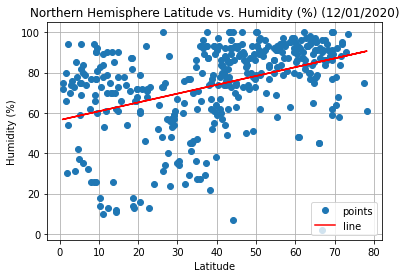

Southern Hemisphere
2      61.392635
3      50.897781
4      65.220566
5      59.794109
6      59.892151
         ...    
589    54.704403
590    64.090942
593    67.756897
595    66.132797
596    65.817352
Name: Latitude, Length: 173, dtype: float32


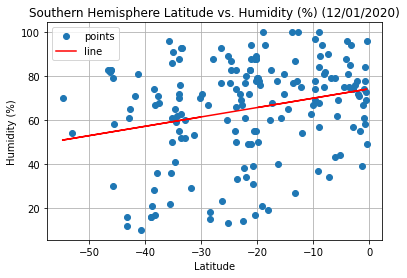

In [39]:
# This code uses a for loop to create both the Northern and Southern Hemisphere charts for Humidity (%) at the same time.
hem_dict = {'Northern Hemisphere': north_df, 'Southern Hemisphere': south_df}

for _hemisphere in hem_dict.keys():
    print(_hemisphere)
    y_axis = "Humidity (%)"
    hem_df = hem_dict[_hemisphere]
    x = hem_df['Latitude']
    y = hem_df[y_axis]
    _title = _hemisphere + " Latitude vs. %s" %y_axis + " (12/01/2020)"
    plt.ylabel("Humidity (%)")
    plt.xlabel("Latitude")
    make_plots(x, y, _title)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      71.308594
1      68.684212
7      46.197903
9      49.774136
11     41.175766
         ...    
591    42.222801
592    51.949791
594    57.905647
597    55.865974
598    65.085312
Name: Latitude, Length: 385, dtype: float32


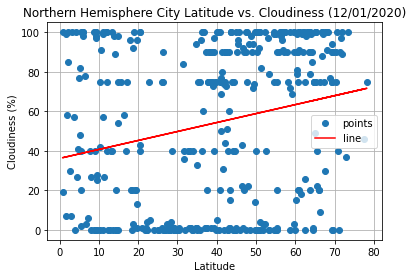

In [40]:
x = north_df["Latitude"]
y = north_df["Cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Get regression values
regress_values = x * slope + intercept
print(regress_values)
plt.plot(x,y, "o", label= "points")
plt.plot(x, intercept + slope * x, "r", label= "line")
plt.legend()
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (12/01/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
# This code is grabbing the Latitude and Cloudiness values from the north_df to create a scatter plot with "o" as the marker and adding a regression line.
# The regression line appears to show some correlation between cloudiness and latitude with cloudiness rising 30 to 40% as you go further from the equator.  

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

2      46.408577
3      31.807827
4      51.734112
5      44.184662
6      44.321060
         ...    
589    37.103714
590    50.162544
593    55.262726
595    53.003227
596    52.564373
Name: Latitude, Length: 173, dtype: float32


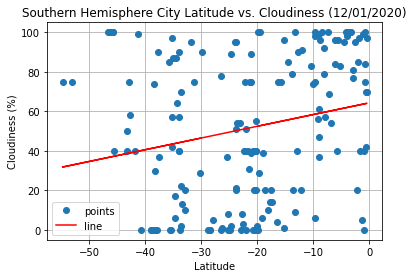

In [41]:
x = south_df["Latitude"]
y = south_df["Cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Get regression values
regress_values = x * slope + intercept
print(regress_values)
plt.plot(x,y, "o", label= "points")
plt.plot(x, intercept + slope * x, "r", label= "line")
plt.legend()
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (12/01/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
# This code is grabbing the Latitude and Cloudiness values from the south_df to create a scatter plot with "o" as the marker and adding a regression line.
# The regression line appears to show some correlation between cloudiness and latitude with cloudiness rising 30% as you get closer to the equator. 

In [ ]:
Northern & Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Northern Hemisphere
0      71.308594
1      68.684212
7      46.197903
9      49.774136
11     41.175766
         ...    
591    42.222801
592    51.949791
594    57.905647
597    55.865974
598    65.085312
Name: Latitude, Length: 385, dtype: float32


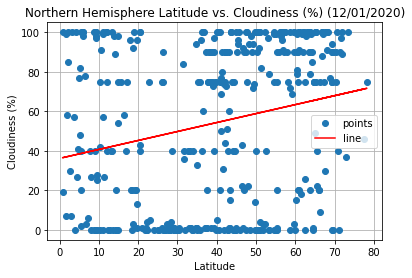

Southern Hemisphere
2      46.408577
3      31.807827
4      51.734112
5      44.184662
6      44.321060
         ...    
589    37.103714
590    50.162544
593    55.262726
595    53.003227
596    52.564373
Name: Latitude, Length: 173, dtype: float32


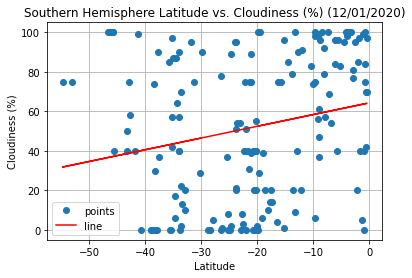

In [42]:
# This code uses a for loop to create both the Northern and Southern Hemisphere charts for Cloudiness (%) at the same time.
hem_dict = {'Northern Hemisphere': north_df, 'Southern Hemisphere': south_df}

for _hemisphere in hem_dict.keys():
    print(_hemisphere)
    y_axis = "Cloudiness (%)"
    hem_df = hem_dict[_hemisphere]
    x = hem_df['Latitude']
    y = hem_df[y_axis]
    _title = _hemisphere + " Latitude vs. %s" %y_axis + " (12/01/2020)"
    plt.ylabel("Cloudiness (%)")
    plt.xlabel("Latitude")
    make_plots(x, y, _title)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      5.988346
1      5.729454
7      3.511212
9      3.864002
11     3.015785
         ...   
591    3.119074
592    4.078628
594    4.666164
597    4.464953
598    5.374428
Name: Latitude, Length: 385, dtype: float32


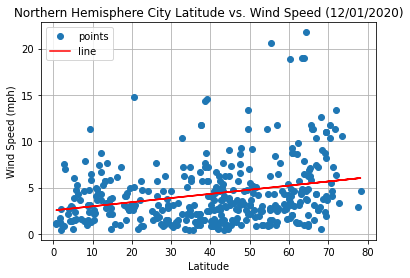

In [43]:
x = north_df["Latitude"]
y = north_df["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Get regression values
regress_values = x * slope + intercept
print(regress_values)
plt.plot(x,y, "o", label= "points")
plt.plot(x, intercept + slope * x, "r", label= "line")
plt.legend()
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (12/01/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
# This code is grabbing the Latitude and Wind Speed values from the north_df to create a scatter plot with "o" as the marker and adding a regression line.
# The regression line confirms little correlation between cloudiness and latitude with cloudiness. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

2      4.847247
3      6.788877
4      4.139050
5      5.142987
6      5.124848
         ...   
589    6.084622
590    4.348039
593    3.669809
595    3.970280
596    4.028640
Name: Latitude, Length: 173, dtype: float32


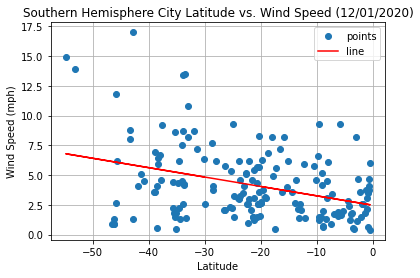

In [44]:
x = south_df["Latitude"]
y = south_df["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Get regression values
regress_values = x * slope + intercept
print(regress_values)
plt.plot(x,y, "o", label= "points")
plt.plot(x, intercept + slope * x, "r", label= "line")
plt.legend()
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (12/01/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
# This code is grabbing the Latitude and Wind Speed values from the south_df to create a scatter plot with "o" as the marker and adding a regression line.
# The regression line confirms little correlation between cloudiness and latitude with cloudiness. 

In [ ]:
Northern & Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Northern Hemisphere
0      5.988346
1      5.729454
7      3.511212
9      3.864002
11     3.015785
         ...   
591    3.119074
592    4.078628
594    4.666164
597    4.464953
598    5.374428
Name: Latitude, Length: 385, dtype: float32


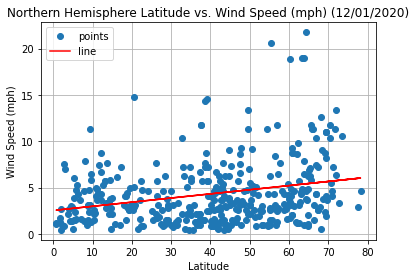

Southern Hemisphere
2      4.847247
3      6.788877
4      4.139050
5      5.142987
6      5.124848
         ...   
589    6.084622
590    4.348039
593    3.669809
595    3.970280
596    4.028640
Name: Latitude, Length: 173, dtype: float32


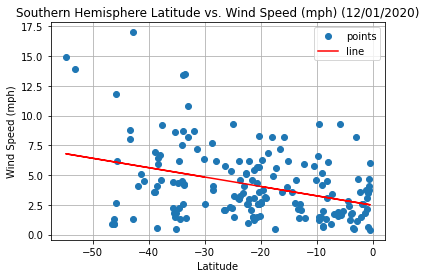

In [45]:
# This code uses a for loop to create both the Northern and Southern Hemisphere charts for Wind Speed (mph) at the same time.
hem_dict = {'Northern Hemisphere': north_df, 'Southern Hemisphere': south_df}

for _hemisphere in hem_dict.keys():
    print(_hemisphere)
    y_axis = "Wind Speed (mph)"
    hem_df = hem_dict[_hemisphere]
    x = hem_df['Latitude']
    y = hem_df[y_axis]
    _title = _hemisphere + " Latitude vs. %s" %y_axis + " (12/01/2020)"
    plt.ylabel("Wind Speed (mph)")
    plt.xlabel("Latitude")
    make_plots(x, y, _title)